In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

In [182]:
endpoint_url = "https://api.coingecko.com/api/v3/ping"

params = {
    "vs_currency": "usd",
    "order": "market_cap_desc",
    "per_page": 10,
    "page": 1
}

reponse = requests.get(endpoint_url)

if reponse.status_code == 200:
    print(reponse.json())
else:
    print("Error: ", reponse.status_code)

{'gecko_says': '(V3) To the Moon!'}


# Having a look at CoinGecko API

An API requires an endpoint direcoty and maybe parameters. Tha's not the case for the end point currencies. We just need the available currencies

#### Coins


Gecko offers literally tons of different coins (10k+)... which is kinda crazy, so let's only focus on the treding to only pick 10 of them.. and let's search what the end point `search/trending` has for us

In [67]:
coingecko = "https://api.coingecko.com/api/v3/"
trend_coins_ep = "search/trending"

trend_coins = requests.get(coingecko + trend_coins_ep).json()
trend_coins

{'coins': [{'item': {'id': 'apecoin',
    'coin_id': 24383,
    'name': 'ApeCoin',
    'symbol': 'APE',
    'market_cap_rank': 64,
    'thumb': 'https://assets.coingecko.com/coins/images/24383/thumb/apecoin.jpg?1647476455',
    'small': 'https://assets.coingecko.com/coins/images/24383/small/apecoin.jpg?1647476455',
    'large': 'https://assets.coingecko.com/coins/images/24383/large/apecoin.jpg?1647476455',
    'slug': 'apecoin',
    'price_btc': 5.8467774987416256e-05,
    'score': 0}},
  {'item': {'id': 'sei-network',
    'coin_id': 28205,
    'name': 'Sei',
    'symbol': 'SEI',
    'market_cap_rank': 108,
    'thumb': 'https://assets.coingecko.com/coins/images/28205/thumb/TKmaTqMv_400x400.jpeg?1668395911',
    'small': 'https://assets.coingecko.com/coins/images/28205/small/TKmaTqMv_400x400.jpeg?1668395911',
    'large': 'https://assets.coingecko.com/coins/images/28205/large/TKmaTqMv_400x400.jpeg?1668395911',
    'slug': 'sei',
    'price_btc': 6.345468091720208e-06,
    'score': 1}},

ok.. when I run into this messy view structures.. I just zoom into each level that compose the object. The throws a simple dictionary.. and let's just get the keys and see what we've got

In [68]:
trend_coins.keys()

dict_keys(['coins', 'nfts', 'exchanges'])

In [69]:
len(trend_coins["coins"]), len(trend_coins["nfts"]), len(trend_coins["exchanges"])

(8, 5, 0)

In [70]:
coin_list_df = pd.DataFrame(trend_coins["coins"]).rename(columns={"item": "coin_information"})
# Only for checkking the appropiate object --> dict, that's ok
type(coin_list_df["coin_information"][0]), coin_list_df["coin_information"][0]

(dict,
 {'id': 'apecoin',
  'coin_id': 24383,
  'name': 'ApeCoin',
  'symbol': 'APE',
  'market_cap_rank': 64,
  'thumb': 'https://assets.coingecko.com/coins/images/24383/thumb/apecoin.jpg?1647476455',
  'small': 'https://assets.coingecko.com/coins/images/24383/small/apecoin.jpg?1647476455',
  'large': 'https://assets.coingecko.com/coins/images/24383/large/apecoin.jpg?1647476455',
  'slug': 'apecoin',
  'price_btc': 5.8467774987416256e-05,
  'score': 0})

In [72]:
coin_list_df # -> We've got a dataframe with dictionaries. Then.. how coul I get those key and arrange them as columns? by creating the columns

,coin_information
0,"{'id': 'apecoin', 'coin_id': 24383, 'name': 'A..."
1,"{'id': 'sei-network', 'coin_id': 28205, 'name'..."
2,"{'id': 'arbitrum', 'coin_id': 16547, 'name': '..."
3,"{'id': 'harrypotterobamapacman8inu', 'coin_id'..."
4,"{'id': 'unibot', 'coin_id': 30462, 'name': 'Un..."
5,"{'id': 'arc', 'coin_id': 24235, 'name': 'Arc',..."
6,"{'id': 'shiba-inu', 'coin_id': 11939, 'name': ..."
7,"{'id': 'worldcoin-wld', 'coin_id': 31069, 'nam..."


In [73]:
# This simple iterator is for building the dataframe by extracting the keys and assigng them as column name.
for key, value in coin_list_df["coin_information"][0].items():
    coin_list_df[key] = coin_list_df["coin_information"].apply(lambda coin: coin[key])


coin_list_df.drop(columns="coin_information", inplace=True)

In [74]:
coin_list_df["thumb"][0]

'https://assets.coingecko.com/coins/images/24383/thumb/apecoin.jpg?1647476455'

In [75]:
coin_list_df.drop(columns=["thumb", "small", "large"], inplace=True)

In [76]:
coin_list_df

,id,coin_id,name,symbol,market_cap_rank,slug,price_btc,score
0,apecoin,24383,ApeCoin,APE,64,apecoin,5.846777e-05,0
1,sei-network,28205,Sei,SEI,108,sei,6.345468e-06,1
2,arbitrum,16547,Arbitrum,ARB,39,arbitrum,3.622890e-05,2
3,harrypotterobamapacman8inu,31241,HarryPotterObamaPacMan8Inu,XRP,476,harrypotterobamapacman8inu,1.347344e-05,3
4,unibot,30462,Unibot,UNIBOT,175,unibot,6.418356e-03,4
5,arc,24235,Arc,ARC,704,arc,9.129403e-07,5
6,shiba-inu,11939,Shiba Inu,SHIB,14,shiba-inu,2.995026e-10,6
7,worldcoin-wld,31069,Worldcoin,WLD,169,worldcoin,5.034525e-05,7


In [77]:
",".join(coin_list_df["id"].tolist())

'apecoin,sei-network,arbitrum,harrypotterobamapacman8inu,unibot,arc,shiba-inu,worldcoin-wld'

In [78]:
search_coin_ep = "search"

search_coin_parameters = {
    "query": "coins"
}

requests.get(coingecko + search_coin_ep, params=search_coin_parameters).json()["coins"][0]

{'id': 'localcoinswap',
 'name': 'LocalCoinSwap',
 'api_symbol': 'localcoinswap',
 'symbol': 'LCS',
 'market_cap_rank': 1289,
 'thumb': 'https://assets.coingecko.com/coins/images/3998/thumb/LocalCoinSwap.png',
 'large': 'https://assets.coingecko.com/coins/images/3998/large/LocalCoinSwap.png'}

#### Getting currencies

`/simple/supported_vs_currencies` end point

In [79]:
supported_currencies_ep = "simple/supported_vs_currencies"

# No parameters requiered

currencies_df = pd.DataFrame(requests.get(coingecko + supported_currencies_ep).json()).rename(columns={0: "currencies"})

In [80]:
currencies_df[currencies_df["currencies"].str.contains("mx*")]

,currencies
7,xlm
17,bmd
36,mmk
37,mxn
38,myr


#### Get Data by ID or Contract

* Get the current coin's price

In [81]:
",".join(coin_list_df["id"].tolist())


'apecoin,sei-network,arbitrum,harrypotterobamapacman8inu,unibot,arc,shiba-inu,worldcoin-wld'

In [82]:
simple_price_ep = "simple/price"

coin_ids = ",".join(coin_list_df["id"].tolist())

simple_price_parameters = {
    "ids": coin_ids,
    "vs_currencies": "usd",
    "include_market_cap": "true",
    "include_24hr_vol": "true",
    "include_24hr_change": "true",
    "include_last_updated_at": "true",
    "precision": "4"
}

simple_price_of_coins_df = pd.DataFrame(requests.get(coingecko + simple_price_ep, params=simple_price_parameters).json()).T

In [83]:
pd.DataFrame(requests.get(coingecko + simple_price_ep, params=simple_price_parameters).json()).T

,usd,usd_market_cap,usd_24h_vol,usd_24h_change,last_updated_at
apecoin,1.5336,5.648653e+08,1.760068e+08,-10.175890,1.692311e+09
arbitrum,0.9600,1.220676e+09,2.409838e+08,-7.951236,1.692311e+09
arc,0.0239,1.717852e+07,2.356964e+06,22.755001,1.692311e+09
harrypotterobamapacman8inu,0.3796,2.984026e+07,2.500399e+06,110.518790,1.692311e+09
sei-network,0.1686,2.991740e+08,5.364072e+08,-11.534265,1.692311e+09
shiba-inu,0.0000,4.621419e+09,4.678565e+08,-15.221279,1.692311e+09
unibot,169.9168,1.680921e+08,9.376655e+06,-7.073205,1.692311e+09
worldcoin-wld,1.3275,1.669997e+08,5.557794e+07,-10.633783,1.692311e+09


In [84]:
simple_price_of_coins_df

,usd,usd_market_cap,usd_24h_vol,usd_24h_change,last_updated_at
apecoin,1.5336,5.648653e+08,1.760068e+08,-10.175890,1.692311e+09
arbitrum,0.9600,1.220676e+09,2.409838e+08,-7.951236,1.692311e+09
arc,0.0239,1.717852e+07,2.356964e+06,22.755001,1.692311e+09
harrypotterobamapacman8inu,0.3796,2.984026e+07,2.500399e+06,110.518790,1.692311e+09
sei-network,0.1686,2.991740e+08,5.364072e+08,-11.534265,1.692311e+09
shiba-inu,0.0000,4.621419e+09,4.678565e+08,-15.221279,1.692311e+09
unibot,169.9168,1.680921e+08,9.376655e+06,-7.073205,1.692311e+09
worldcoin-wld,1.3275,1.669997e+08,5.557794e+07,-10.633783,1.692311e+09


#### Historical Data

These 4 last years has been kind of abnormal since the pandemia took place at the end of 2019.. So let's Explore those years

The end points used are:

`/coin/...` 

        `/coins/{id}/market_chart`

In [98]:
var = "hello"
f"some texts {var} here"

'some texts hello here'

Let's run a simple attempt to get a historical data from any coin.. later, this will be run through all coins

In [106]:
# Trying out this single coin to see what we get
coin_id = "apecoin"

market_chart_ep = f"coins/{coin_id}/market_chart" # -> create our endpoint string


# The parameters
market_chart_parameters = {
    "vs_currency": "usd",
    # days parameters give us how many days.. here I will set it up as max to find out what is the biggest range provided
    "days": "max", 
    "interval": "daily",
    "precision": "4"
}

market_chart_coin_df = pd.DataFrame(requests.get(coingecko + market_chart_ep, params=market_chart_parameters).json())


In [111]:
market_chart_coin_df # -> Each column has its own UNIX imestamp. We ought to re shape and convert, but first, I want to check the date range the end point could throws at the most

,prices,market_caps,total_volumes
0,"[1647475200000, 8.5368]","[1647475200000, 946081401.9243534]","[1647475200000, 1455626533.6918294]"
1,"[1647561600000, 8.5368]","[1647561600000, 946081401.9243534]","[1647561600000, 1455626533.6918294]"
2,"[1647648000000, 12.9887]","[1647648000000, 1740629590.0400217]","[1647648000000, 5214126303.852453]"
3,"[1647734400000, 11.5352]","[1647734400000, 1542254655.9177086]","[1647734400000, 1816679748.2748725]"
4,"[1647820800000, 9.6182]","[1647820800000, 1261482818.2726943]","[1647820800000, 1381888008.2736359]"
...,...,...,...
515,"[1691971200000, 2.003]","[1691971200000, 735512264.9558252]","[1691971200000, 107841022.50986096]"
516,"[1692057600000, 2.0577]","[1692057600000, 759791210.4290547]","[1692057600000, 128609570.57890883]"
517,"[1692144000000, 1.8437]","[1692144000000, 679107753.6536336]","[1692144000000, 105204639.42863622]"
518,"[1692230400000, 1.7271]","[1692230400000, 638397627.6743878]","[1692230400000, 92594422.39837572]"


It seems each column has its own timestamp, this timestamp is in UNIX.. so that we have to reshape this in order to get the dataframe ready for time series visualization

In [112]:
pd.to_datetime(1684454400000, unit="ms") # it worked

Timestamp('2023-05-19 00:00:00')

In [113]:
# Let's try this out.. 
pd.to_datetime(market_chart_coin_df["prices"].apply(lambda price: price[0]), unit="ms") 

0     2022-03-17 00:00:00
1     2022-03-18 00:00:00
2     2022-03-19 00:00:00
3     2022-03-20 00:00:00
4     2022-03-21 00:00:00
              ...        
515   2023-08-14 00:00:00
516   2023-08-15 00:00:00
517   2023-08-16 00:00:00
518   2023-08-17 00:00:00
519   2023-08-17 22:27:10
Name: prices, Length: 520, dtype: datetime64[ns]

Know that it is known how to convert UNIX dates, Let's see the date range the end point could give us

In [107]:
pd.to_datetime(market_chart_coin_df["prices"].apply(lambda prices: prices[0]), unit="ms").min(), pd.to_datetime(market_chart_coin_df["prices"].apply(lambda prices: prices[0]), unit="ms").max()

(Timestamp('2022-03-17 00:00:00'), Timestamp('2023-08-17 22:27:10'))

In [109]:
pd.to_datetime(market_chart_coin_df["prices"].apply(lambda prices: prices[0]), unit="ms").max() - pd.to_datetime(market_chart_coin_df["prices"].apply(lambda prices: prices[0]), unit="ms").min()

Timedelta('518 days 22:27:10')

The endpoint throws only 518 days and 22:27.. ok.. one option is to split into date ranges, make multiple requests, and append all the data into one dataframe.

* Getting UNIX dates:
        Translate them

* Multiple request on `coins/{coin_id}/market_chart/range` end point

* Stack the whole data into only single dataframe

#### Searching for Other coins

It is shown that it is not good idea to use the trend coins for selection of the coins to be analyzed... this throws any trending coin, regardless of its maturity.

In [202]:
import requests

url = "https://api.coingecko.com/api/v3/coins/markets"
params = {
    "vs_currency": "usd",   # You can change this to your preferred currency
    "order": "market_cap_desc",  # Order by market cap in descending order
    "per_page": 100,   # Adjust the number of coins per page as needed
    "page": 1  # Page number
}

response = requests.get(url, params=params)
data = response.json()

In [203]:
# And I do not know what data is thrown in this endpoint. Let's extract columns and find its description
pd.DataFrame(data).columns

Index(['id', 'symbol', 'name', 'image', 'current_price', 'market_cap',
       'market_cap_rank', 'fully_diluted_valuation', 'total_volume',
       'high_24h', 'low_24h', 'price_change_24h',
       'price_change_percentage_24h', 'market_cap_change_24h',
       'market_cap_change_percentage_24h', 'circulating_supply',
       'total_supply', 'max_supply', 'ath', 'ath_change_percentage',
       'ath_date', 'atl', 'atl_change_percentage', 'atl_date', 'roi',
       'last_updated'],
      dtype='object')

In [172]:
pd.DataFrame(data).head()

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,26720.000000,519584642006,1,5.606874e+11,2.535270e+10,28827.00000,...,2.100000e+07,2.100000e+07,69045.00,-61.17710,2021-11-10T14:24:11.849Z,67.810000,39430.41847,2013-07-06T00:00:00.000Z,None,2023-08-17T23:32:24.550Z
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1697.990000,203890102061,2,2.038901e+11,1.742025e+10,1809.46000,...,1.201359e+08,NaN,4878.26,-65.04560,2021-11-10T14:24:19.604Z,0.432979,393722.15173,2015-10-20T00:00:00.000Z,"{'times': 83.96784023071945, 'currency': 'btc'...",2023-08-17T23:32:20.977Z
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,1.001000,82906264886,3,8.308131e+10,4.688261e+10,1.02200,...,8.301725e+10,NaN,1.32,-24.50066,2018-07-24T00:00:00.000Z,0.572521,74.47887,2015-03-02T00:00:00.000Z,None,2023-08-17T23:30:00.629Z
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,220.470000,33878653135,4,4.403939e+10,9.115891e+08,232.17000,...,1.538562e+08,2.000000e+08,686.31,-67.74186,2021-05-10T07:24:17.097Z,0.039818,555908.35417,2017-10-19T00:00:00.000Z,None,2023-08-17T23:32:18.597Z
4,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,0.509925,26934596940,5,5.097208e+10,2.180772e+09,0.59325,...,9.998850e+10,1.000000e+11,3.40,-84.89252,2018-01-07T00:00:00.000Z,0.002686,19013.20291,2014-05-22T00:00:00.000Z,None,2023-08-17T23:32:18.646Z


#### Columns Description of `coins/markets` endpoint

1. `id`: The unique identifier of the cryptocurrency.
2. `symbol`: The symbol or ticker of the cryptocurrency.
3. `name`: The name of the cryptocurrency.
4. `image`: The URL of an image representing the cryptocurrency.
5. `current_price`: The current price of the cryptocurrency.
6. `market_cap`: The market capitalization of the cryptocurrency.
7. `market_cap_rank`: The ranking of the cryptocurrency based on its market capitalization.
8. `fully_diluted_valuation`: The valuation of the cryptocurrency if all coins are in circulation.
9. `total_volume`: The total trading volume of the cryptocurrency.
10. `high_24h`: The highest price recorded in the last 24 hours.
11. `low_24h`: The lowest price recorded in the last 24 hours.
12. `price_change_24h`: The price change of the cryptocurrency in the last 24 hours.
13. `price_change_percentage_24h`: The percentage price change of the cryptocurrency in the last 24 hours.
14. `market_cap_change_24h`: The market capitalization change of the cryptocurrency in the last 24 hours.
15. `market_cap_change_percentage_24h`: The percentage market capitalization change of the cryptocurrency in the last 24 hours.
16. `circulating_supply`: The amount of cryptocurrency currently in circulation.
17. `total_supply`: The total supply of the cryptocurrency.
18. `max_supply`: The maximum supply of the cryptocurrency.
19. `ath`: The all-time high price of the cryptocurrency.
20. `ath_change_percentage`: The percentage change from the all-time high price.
21. `ath_date`: The date when the all-time high price was reached.
22. `atl`: The all-time low price of the cryptocurrency.
23. `atl_change_percentage`: The percentage change from the all-time low price.
24. `atl_date`: The date when the all-time low price was reached.
25. `roi`: Return on investment data for the cryptocurrency.
26. `last_updated`: The timestamp of when the data was last updated.


The search and chose of coins it will be kind of tricky and drainfull.

So in order to perform testing I will google some coin in order to search in an "old" crypto coin

"tether" is a good choice


### Getting years ranges

In [204]:
import time
from datetime import datetime

current_year = datetime.now().year
start_year = 2018

years_ranges = []

for year in range(start_year, current_year + 1):
    first_day = datetime(year, 1, 1)
    last_day = datetime.now() if year == current_year else datetime(year, 12, 31, 23, 59, 59)
    
    first_day_unix = int(time.mktime(first_day.timetuple()))
    last_day_unix = int(time.mktime(last_day.timetuple()))

    years_ranges.append((first_day_unix, last_day_unix))
    
    print(f"Year {year}: First Day UNIX Timestamp: {first_day_unix}, Last Day UNIX Timestamp: {last_day_unix}")



Year 2018: First Day UNIX Timestamp: 1514786400, Last Day UNIX Timestamp: 1546322399
Year 2019: First Day UNIX Timestamp: 1546322400, Last Day UNIX Timestamp: 1577858399
Year 2020: First Day UNIX Timestamp: 1577858400, Last Day UNIX Timestamp: 1609480799
Year 2021: First Day UNIX Timestamp: 1609480800, Last Day UNIX Timestamp: 1641016799
Year 2022: First Day UNIX Timestamp: 1641016800, Last Day UNIX Timestamp: 1672552799
Year 2023: First Day UNIX Timestamp: 1672552800, Last Day UNIX Timestamp: 1692319078


In [205]:
years_ranges

[(1514786400, 1546322399),
 (1546322400, 1577858399),
 (1577858400, 1609480799),
 (1609480800, 1641016799),
 (1641016800, 1672552799),
 (1672552800, 1692319078)]

In [206]:
pd.to_datetime(1641016800, unit="s"), pd.to_datetime(1641016799, unit="s") 

(Timestamp('2022-01-01 06:00:00'), Timestamp('2022-01-01 05:59:59'))

In [207]:
years_ranges[4]

(1641016800, 1672552799)

In [208]:
# Trying out the range end point
# From list of years, grabbing manually each tuple and pass them into the arguments of the parameters dictionary will allow to check data thrown from the end point

coin_id = "tether"

market_chart_coin_range = f"coins/{coin_id}/market_chart/range"

market_chart_coin_range_parameters = {
    "vs_currency": "usd",
    "from": str(years_ranges[0][0]),
    "to": str(years_ranges[0][1])
}

pd.DataFrame(requests.get(coingecko + market_chart_coin_range, params=market_chart_coin_range_parameters).json()) # -> ok.. only data thrown since 2022 for ape coin.

,prices,market_caps,total_volumes
0,"[1514851200000, 1.00392]","[1514851200000, 1373452749.16104]","[1514851200000, 2632020000.0]"
1,"[1514937600000, 1.01578]","[1514937600000, 1389678294.62786]","[1514937600000, 2461680000.0]"
2,"[1515024000000, 1.00274]","[1515024000000, 1472112403.15338]","[1515024000000, 3203460000.0]"
3,"[1515110400000, 0.999695]","[1515110400000, 1467642069.599715]","[1515110400000, 3096040000.0]"
4,"[1515196800000, 1.00853]","[1515196800000, 1480612643.30961]","[1515196800000, 2622980000.0]"
...,...,...,...
360,"[1545955200000, 0.9960712758722144]","[1545955200000, 2056263837.5365794]","[1545955200000, 119495547.69858119]"
361,"[1546041600000, 1.0035451583660302]","[1546041600000, 2064938691.1037617]","[1546041600000, 134285162.42261878]"
362,"[1546128000000, 0.9940035724621251]","[1546128000000, 2048421031.6895096]","[1546128000000, 73987954.84032907]"
363,"[1546214400000, 1.0060620406920209]","[1546214400000, 2071214917.0616748]","[1546214400000, 88135480.17617014]"


The above code would be good to be encapsulate into a function in order to request by year range

In [183]:
def df_from_market_chart_range(coin_id:str, from_year:int, to_year:int):

    market_chart_coin_range = f"coins/{coin_id}/market_chart/range"

    market_chart_coin_range_parameters = {
        "vs_currency": "usd",
        "from": str(from_year),
        "to": str(to_year)
    }

    return pd.DataFrame(requests.get(coingecko + market_chart_coin_range, params=market_chart_coin_range_parameters).json())

In [188]:
data_frames = []

for year_range in years_ranges:

    data_frames.append(df_from_market_chart_range(coin_id="tether", from_year=year_range[0], to_year=year_range[1]))

coin_market_chart = pd.concat(data_frames, axis=0, ignore_index=True)

In [201]:
pd.to_datetime(coin_market_chart["prices"].apply(lambda prices: prices[0]), unit="ms").min(), pd.to_datetime(coin_market_chart["prices"].apply(lambda prices: prices[0]), unit="ms").max()

(Timestamp('2018-01-02 00:00:00'), Timestamp('2023-08-17 00:00:00'))

Awesome! Finally a dataframe is gotten

In [209]:
coin_market_chart

,prices,market_caps,total_volumes
0,"[1514851200000, 1.00392]","[1514851200000, 1373452749.16104]","[1514851200000, 2632020000.0]"
1,"[1514937600000, 1.01578]","[1514937600000, 1389678294.62786]","[1514937600000, 2461680000.0]"
2,"[1515024000000, 1.00274]","[1515024000000, 1472112403.15338]","[1515024000000, 3203460000.0]"
3,"[1515110400000, 0.999695]","[1515110400000, 1467642069.599715]","[1515110400000, 3096040000.0]"
4,"[1515196800000, 1.00853]","[1515196800000, 1480612643.30961]","[1515196800000, 2622980000.0]"
...,...,...,...
2048,"[1691884800000, 0.9993771983831886]","[1691884800000, 83355420569.70955]","[1691884800000, 9189020281.947243]"
2049,"[1691971200000, 0.9993836393270443]","[1691971200000, 83303287526.81169]","[1691971200000, 9254138040.705431]"
2050,"[1692057600000, 0.998712649259746]","[1692057600000, 83323482665.83325]","[1692057600000, 12792365654.7868]"
2051,"[1692144000000, 0.9988934302939576]","[1692144000000, 83089141821.30199]","[1692144000000, 18746693270.259033]"


In [211]:
coin_market_chart["dates"] = pd.to_datetime(coin_market_chart["prices"].apply(lambda price: price[0]), unit="ms")

In [213]:
coin_market_chart["prices"] = coin_market_chart["prices"].apply(lambda price: price[1])
coin_market_chart["market_caps"] = coin_market_chart["market_caps"].apply(lambda market: market[1])
coin_market_chart["total_volumes"] = coin_market_chart["total_volumes"].apply(lambda vol: vol[1])

In [214]:
coin_market_chart

,prices,market_caps,total_volumes,dates
0,1.003920,1.373453e+09,2.632020e+09,2018-01-02
1,1.015780,1.389678e+09,2.461680e+09,2018-01-03
2,1.002740,1.472112e+09,3.203460e+09,2018-01-04
3,0.999695,1.467642e+09,3.096040e+09,2018-01-05
4,1.008530,1.480613e+09,2.622980e+09,2018-01-06
...,...,...,...,...
2048,0.999377,8.335542e+10,9.189020e+09,2023-08-13
2049,0.999384,8.330329e+10,9.254138e+09,2023-08-14
2050,0.998713,8.332348e+10,1.279237e+10,2023-08-15
2051,0.998893,8.308914e+10,1.874669e+10,2023-08-16


In [216]:
coin_market_chart.set_index("dates", drop=True, inplace=True)

In [218]:
coin_market_chart

,prices,market_caps,total_volumes
dates,,,
2018-01-02,1.003920,1.373453e+09,2.632020e+09
2018-01-03,1.015780,1.389678e+09,2.461680e+09
2018-01-04,1.002740,1.472112e+09,3.203460e+09
2018-01-05,0.999695,1.467642e+09,3.096040e+09
2018-01-06,1.008530,1.480613e+09,2.622980e+09
...,...,...,...
2023-08-13,0.999377,8.335542e+10,9.189020e+09
2023-08-14,0.999384,8.330329e+10,9.254138e+09
2023-08-15,0.998713,8.332348e+10,1.279237e+10


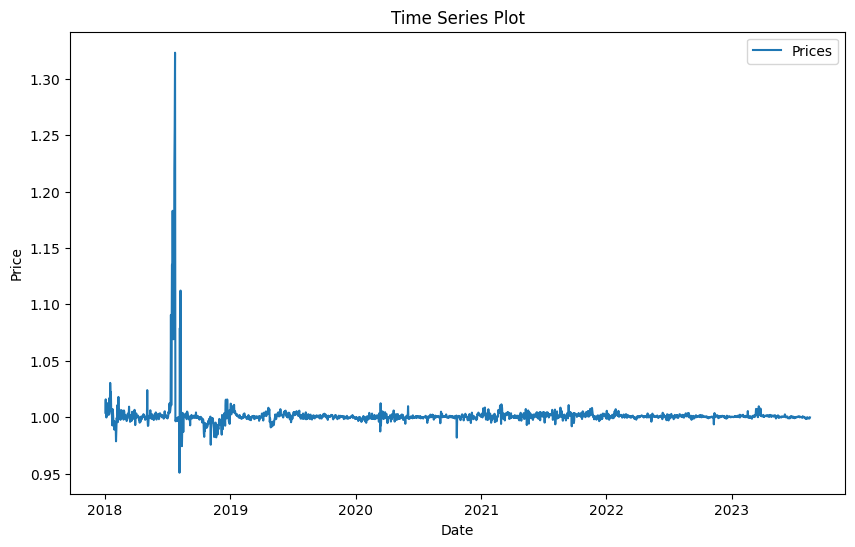

In [220]:


plt.figure(figsize=(10, 6), )
plt.plot(coin_market_chart.index, coin_market_chart["prices"], label="Prices")
# plt.plot(market_chart_coin_df.index, market_chart_coin_df["market_caps"], label="Market Caps")
# plt.plot(market_chart_coin_df.index, market_chart_coin_df["total_volumes"], label="Total Volumes")

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Time Series Plot')
plt.legend()
plt.show()



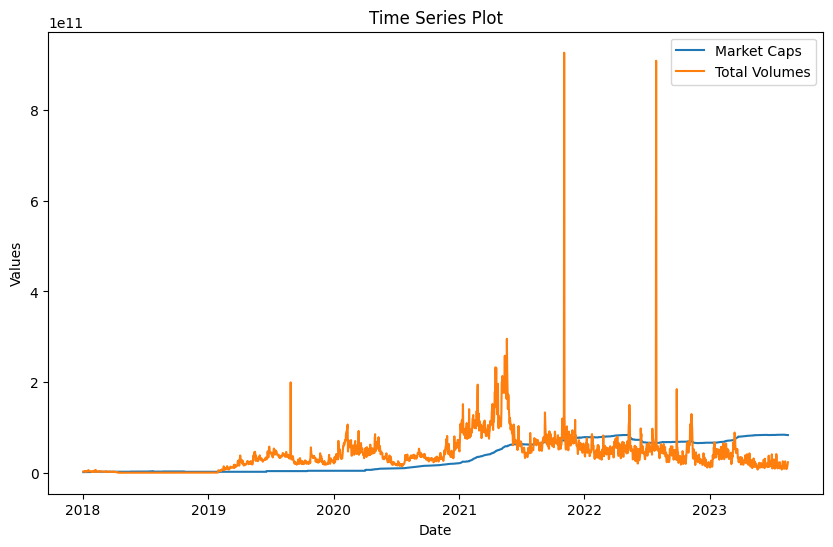

In [221]:
plt.figure(figsize=(10, 6))
#plt.plot(market_chart_coin_df.index, market_chart_coin_df["prices"], label="Prices")
plt.plot(coin_market_chart.index, coin_market_chart["market_caps"], label="Market Caps")
plt.plot(coin_market_chart.index, coin_market_chart["total_volumes"], label="Total Volumes")

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time Series Plot')
plt.legend()
plt.show()